In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sync_plots import calc_and_plot_Q_and_S
from sync_calcs import dm2bloch, get_disipators, signal_hamiltonian
from qutip import *

# Unitary Data

In [3]:
states = np.load('results/unitary/unitary-v2-corrected.npy')

# Populations
ups = [state[0, 0].real for state in states]
downs = [state[1, 1].real for state in states]

In [13]:
detuning = 5 * 3 * 0.1
signal_strength = 5 * 2 * 0.1

H = signal_hamiltonian(detuning, signal_strength)

t = np.linspace(0, 16, 100)

result = mesolve(H, ket2dm(basis(2, 0)), t * 0.2)

cont_ups = [state[0, 0].real for state in result.states]
cont_downs = [state[1, 1].real for state in result.states]

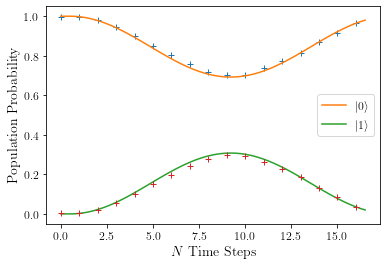

In [22]:
fig, ax = plt.subplots()

ax.plot(ups, '+')
ax.plot([0, *(t + 0.5)], [1, *cont_ups], '-', label=r"$|0\rangle$")
ax.plot([0, *(t + 0.5)], [0, *cont_downs], '-', label=r"$|1\rangle$")
ax.plot(downs, '+')

ax.set_xlabel('$N$ Time Steps')
ax.set_ylabel('Population Probability')
ax.legend()

In [6]:
# Coherences
coh_arg = [np.angle(state[1, 0]) / np.pi for state in states]
coh_mod = [np.abs(state[1, 0]) for state in states]

cont_coh_arg = [np.angle(state[1, 0]) / np.pi for state in result.states]
cont_coh_mod = [np.abs(state[1, 0]) for state in result.states]

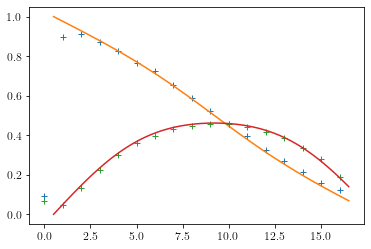

In [23]:
fig, ax = plt.subplots()

ax.plot(coh_arg, "+")
ax.plot(t + 0.5, -np.array(cont_coh_arg) + 1, "-")
ax.plot(coh_mod, "+")
ax.plot(t + 0.5, cont_coh_mod, "-")


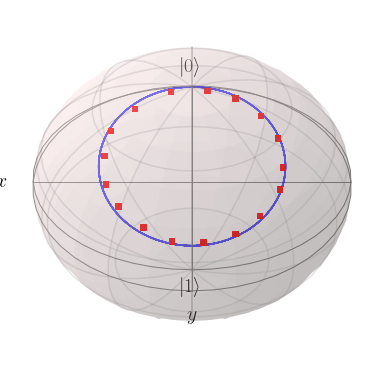

In [8]:
detuning = 0.3
signal_strength = 0.2

H = signal_hamiltonian(detuning, signal_strength)
result = mesolve(H, basis(2, 0), np.linspace(0, 100, 1000))

b = Bloch()
points = dm2bloch([Qobj(s) for s in states])
b.add_points(dm2bloch(result.states), 'l')
b.add_points(points, meth="s")
b.view = [0, 40]
b.show()

# Unitary + Loss

In [9]:
dat = np.load(f'unitary+loss-v2-10-corrected.npy')
b = Bloch()
points = dm2bloch(dat)
b.add_points(points, meth="s")
b.add_points(points, meth="l")
b.view = [0, 70]
b.show()

FileNotFoundError: [Errno 2] No such file or directory: 'unitary+loss-v2-10-corrected.npy'

In [ ]:
data = []

for i in range(1, 3):
    d = np.load(f'unitary+loss-v4-corrected-{i}.npy')
    data.append(d)

In [ ]:
mean_states = np.mean(data, axis=0)
b = Bloch()
points = dm2bloch(mean_states)
b.add_points(points, meth="s")
b.add_points(points, meth="l")
b.view = [0, 70]
b.show()

# 100

In [ ]:
states = np.load('100-steps-corrected.npy')[10:]
b = Bloch()
points = dm2bloch(states)
b.add_points(points, meth="s")
b.add_points(points, meth="l")
b.view = [0, 70]
b.show()

In [ ]:
# Populations
ups = [state[0, 0].real for state in states]
downs = [state[1, 1].real for state in states]

In [ ]:
fig, ax = plt.subplots()
ax.plot(ups, '+')
ax.plot(downs, '+')